### Week 14: Ethics & Explainability

#### 1. Import Libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap  # SHAP for explainability
import matplotlib.pyplot as plt


In [30]:
# ---------------------------
# 2. Load Dataset
# ---------------------------
# Replace 'house_data.csv' with your dataset file
df = pd.read_csv(r"C:\Users\123\Documents\Semester 7\Data-Science-AI-Course\Data\Raw\house_prices.csv")

# Quick overview
print(df.head())
print(df.info())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [31]:
# Check all column names in your dataset
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
import pandas as pd

df = pd.read_csv(r"C:\Users\123\Documents\Semester 7\Data-Science-AI-Course\Data\Raw\house_prices.csv")
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePri

In [22]:
# Drop rows where target 'SalePrice' is missing
df = df.dropna(subset=['SalePrice'])

# Separate features and target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Fill missing numeric values with median
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    if not X[col].mode().empty:
        X[col] = X[col].fillna(X[col].mode()[0])
    else:
        X[col] = X[col].fillna("Unknown")

# Encode categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure all columns are numeric (float64)
X_encoded = X_encoded.astype(float)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1168, 245)
X_test shape: (292, 245)
y_train shape: (1168,)
y_test shape: (292,)


#### Train Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest using encoded features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # <-- X_train is now numeric only (X_encoded)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 803842286.93
R2 Score: 0.90


#### SHAP Explainability

In [33]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)


#### SHAP Summary Plot

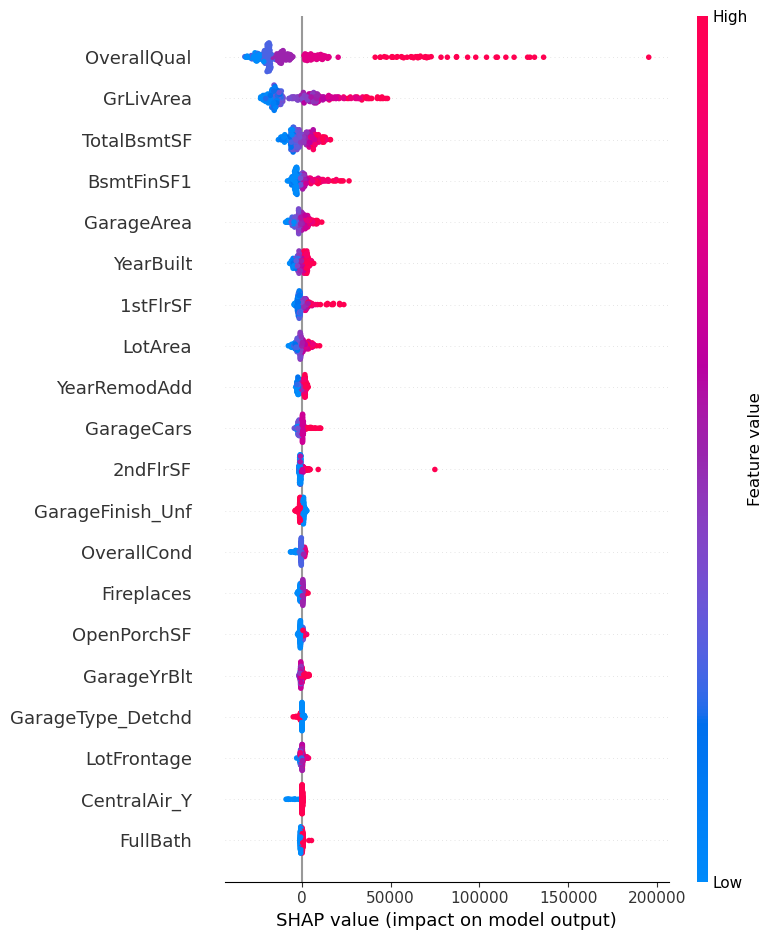

In [34]:
# SHAP summary plot: shows feature importance for all predictions
shap.summary_plot(shap_values, X_test)


This plot shows:

Which features contribute most to house price predictions.

Color indicates feature value (red = high, blue = low).

#### SHAP Force Plot (Example for first test instance)

In [35]:
# Interactive force plot for first prediction
shap.initjs()  # initialize JS visualization
shap.force_plot(
    explainer.expected_value,  # base value (average prediction)
    shap_values[0].values,     # SHAP values for first instance
    X_test.iloc[0]             # feature values for first instance
)


Shows why the model predicted this specific house price.

Features pushing prediction up are in red, pushing down are in blue.

#### Save SHAP Summary Plot as Image

SHAP summary plot saved as 'shap_summary_plot.png'


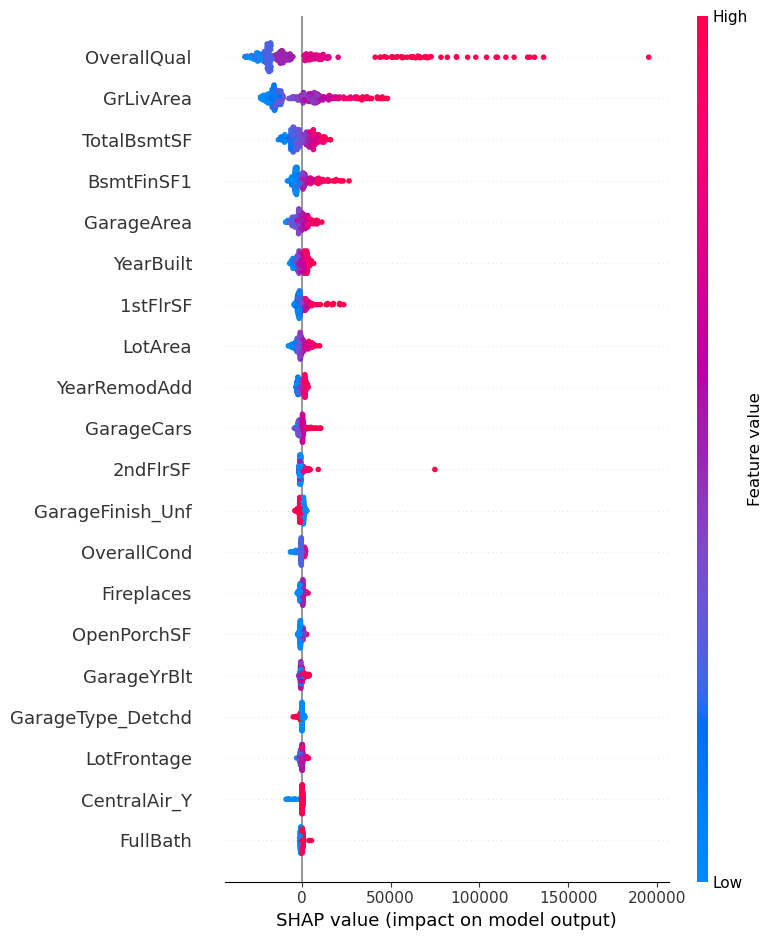

In [36]:
import matplotlib.pyplot as plt

# Save the summary plot
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)  # do not display
plt.savefig("shap_summary_plot.png", bbox_inches='tight')
print("SHAP summary plot saved as 'shap_summary_plot.png'")
